### Project Title: Accident Severity Prediction 

#### Objective: The goal of this project is to build a machine learning model capable of accurately predicting the severity of car accidents. By leveraging real-world data, they aim to provide valuable insights to emergency responders and enable proactive measures for mitigating accident severity. 

#### Project Benefits:

##### Saving Lives: Accurately predicting accident severity allows emergency responders to prioritize resources effectively, potentially saving lives.

##### Data-Driven Safety Insights: The model will identify key factors contributing to severe accidents, guiding targeted safety campaigns, making informed product development.

##### Improved Resource Allocation: Predicting accident severity can optimize the dispatch of emergency response teams,resources, improving overall efficiency.



### Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading the dataset

In [25]:
df = pd.read_excel(r"C:\Users\HP\Downloads\python learning\Vehicle Collision.xlsx")

### Exploratory Data Analysis (EDA)

#### Exploratory Data Analysis (EDA) is like the first step in understanding a story. It helps us dig deep into how the data is organized, find hidden patterns, and discover important trends. During EDA, we look closely at how each piece of information is spread out, check if things are connected, and find out the special connections between different parts.

#### We use visual tools a lot during EDA. These tools help us see the data clearly, understand the features and figure out what things might affect the 'Acciedent_Severity'.

In [75]:
# Display the first few rows of the dataset
df.head()


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX,AGE_BIN
0,10253606,4230743.0,2019-10-24,19:15:00,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.0,Not Ejected,...,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,NaN,NaN,M,19-30
1,10248708,4229547.0,2019-10-26,01:15:00,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,NaN,24.0,NaN,...,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F,19-30
2,10254556,4230715.0,2019-10-26,08:50:00,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832.0,42.0,Not Ejected,...,Driver,Unknown,NaN,NaN,None Visible,Driver,NaN,NaN,M,31-45
3,10250834,4230376.0,2019-10-26,19:40:00,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949.0,36.0,Not Ejected,...,Driver,NaN,NaN,NaN,Internal,Driver,NaN,NaN,M,31-45
4,10252474,4229773.0,2019-10-26,16:50:00,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773.0,50.0,Not Ejected,...,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F,46-60


In [76]:
# Display the last few rows of the dataset
df.tail()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX,AGE_BIN
230655,10091762,4193169.0,2019-08-22,14:00:00,7a710fd4-d131-4f2f-a7d9-942c34a60fc2,Occupant,Injured,19062202.0,56.0,Not Ejected,...,"Left rear passenger, or rear passenger on a bi...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F,46-60
230656,"""error"" : true",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230657,"""message"" : ""Internal error""",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230658,"""status"" : 500",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230659,},NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Summary Statistics
print("Summary Statistics:")
df.describe()


Summary Statistics:


,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,2.306560e+05,1.819370e+05,229628.000000
mean,2.824113e+06,1.567930e+07,36.594287
std,1.497211e+06,3.051295e+06,84.310796
min,3.900000e+01,6.029470e+05,0.000000
25%,2.812695e+06,1.353522e+07,23.000000
50%,3.474966e+06,1.714574e+07,33.000000
75%,3.873819e+06,1.795996e+07,49.000000
max,4.695378e+06,2.058575e+07,9999.000000


In [77]:
# Check for missing values
df.isnull().sum()



UNIQUE_ID                     0
COLLISION_ID                  4
CRASH_DATE                    4
CRASH_TIME                    4
PERSON_ID                     7
PERSON_TYPE                   4
PERSON_INJURY                 4
VEHICLE_ID                48723
PERSON_AGE                 1032
EJECTION                 127873
EMOTIONAL_STATUS         103742
BODILY_INJURY            103701
POSITION_IN_VEHICLE      127754
SAFETY_EQUIPMENT         140540
PED_LOCATION             204368
PED_ACTION               204430
COMPLAINT                103687
PED_ROLE                 103687
CONTRIBUTING_FACTOR_1    205452
CONTRIBUTING_FACTOR_2    205477
PERSON_SEX               103768
AGE_BIN                    1032
dtype: int64

In [81]:
def missing_values_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean() * 100
    # Filter columns with missing values
    missing_percentage = missing_percentage[missing_percentage > 0]
    return missing_percentage

# Calculate the percentage of missing values
missing_percentage = missing_values_percentage(df)

# Print the percentage of missing values
print(missing_percentage)

COLLISION_ID              0.001734
CRASH_DATE                0.001734
CRASH_TIME                0.001734
PERSON_ID                 0.003035
PERSON_TYPE               0.001734
PERSON_INJURY             0.001734
VEHICLE_ID               21.123298
PERSON_AGE                0.447412
EJECTION                 55.437874
EMOTIONAL_STATUS         44.976155
BODILY_INJURY            44.958380
POSITION_IN_VEHICLE      55.386283
SAFETY_EQUIPMENT         60.929507
PED_LOCATION             88.601405
PED_ACTION               88.628284
COMPLAINT                44.952311
PED_ROLE                 44.952311
CONTRIBUTING_FACTOR_1    89.071360
CONTRIBUTING_FACTOR_2    89.082199
PERSON_SEX               44.987427
AGE_BIN                   0.447412
dtype: float64


In [79]:
# Check for duplicates in Customer_id
df.duplicated().sum()


0

In [80]:
# Checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230660 entries, 0 to 230659
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   UNIQUE_ID              230660 non-null  object        
 1   COLLISION_ID           230656 non-null  float64       
 2   CRASH_DATE             230656 non-null  datetime64[ns]
 3   CRASH_TIME             230656 non-null  object        
 4   PERSON_ID              230653 non-null  object        
 5   PERSON_TYPE            230656 non-null  object        
 6   PERSON_INJURY          230656 non-null  object        
 7   VEHICLE_ID             181937 non-null  float64       
 8   PERSON_AGE             229628 non-null  float64       
 9   EJECTION               102787 non-null  object        
 10  EMOTIONAL_STATUS       126918 non-null  object        
 11  BODILY_INJURY          126959 non-null  object        
 12  POSITION_IN_VEHICLE    102906 non-null  obje

In [27]:
# Frequency Analysis
print("\nFrequency Analysis:")
print(df['PERSON_TYPE'].value_counts())
print(df['PERSON_INJURY'].value_counts())
print(df['EJECTION'].value_counts())
print(df['EMOTIONAL_STATUS'].value_counts())
print(df['BODILY_INJURY'].value_counts())
print(df['POSITION_IN_VEHICLE'].value_counts())
print(df['SAFETY_EQUIPMENT'].value_counts())
print(df['PED_LOCATION'].value_counts())
print(df['PED_ACTION'].value_counts())
print(df['COMPLAINT'].value_counts())
print(df['PED_ROLE'].value_counts())
print(df['CONTRIBUTING_FACTOR_1'].value_counts())
print(df['CONTRIBUTING_FACTOR_2'].value_counts())
print(df['PERSON_SEX'].value_counts())


Frequency Analysis:
Occupant           164237
Pedestrian          48288
Bicyclist           18091
Other Motorized        40
Name: PERSON_TYPE, dtype: int64
Injured    229633
Killed       1023
Name: PERSON_INJURY, dtype: int64
Not Ejected          94848
Ejected               4792
Does Not Apply        1629
Partially Ejected     1257
Trapped                198
Unknown                 63
Name: EJECTION, dtype: int64
Conscious         118063
Unknown             3183
Shock               2958
Semiconscious        808
Unconscious          646
Incoherent           523
Does Not Apply       407
Apparent Death       330
Name: EMOTIONAL_STATUS, dtype: int64
Neck                    21778
Back                    21065
Knee-Lower Leg Foot     18583
Head                    16864
Entire Body              9844
Elbow-Lower-Arm-Hand     8445
Shoulder - Upper Arm     8433
Unknown                  6113
Hip-Upper Leg            4796
Chest                    4728
Face                     3366
Abdomen - Pelvi

### Categorizing age 

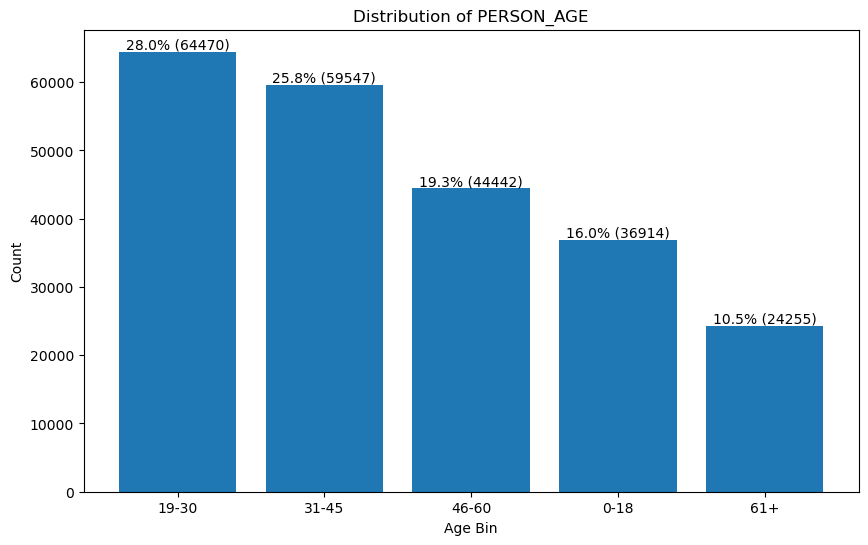

In [66]:
import pandas as pd
import matplotlib.pyplot as plt



# Replace negative values with NaN
df['PERSON_AGE'] = df['PERSON_AGE'].where(df['PERSON_AGE'] >= 0)

# Create bins for PERSON_AGE
age_bins = [0, 18, 30, 45, 60, float('inf')]  # 6 bins
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Cut the PERSON_AGE column into bins
df['AGE_BIN'] = pd.cut(df['PERSON_AGE'], bins=age_bins, labels=age_labels, include_lowest=True)

# Calculate the count and percentage of each age bin
age_bin_counts = df['AGE_BIN'].value_counts()
age_bin_percentages = (age_bin_counts / len(df)) * 100

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(age_bin_counts.index, age_bin_counts.values)

# Add percentage labels above each bar
for i, (count, percent) in enumerate(zip(age_bin_counts.values, age_bin_percentages.values)):
    plt.text(i, count + 3, f'{percent:.1f}% ({count})', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.title('Distribution of PERSON_AGE')

# Show the plot
plt.show()

#### Insights : The majority of accidents involve individuals between 19-30 (28%) and 31-45 (25.8%) years old, suggesting that this age range is most prone to accidents. The remaining age groups have significantly lower accident rates, indicating a lower risk of accidents.. 


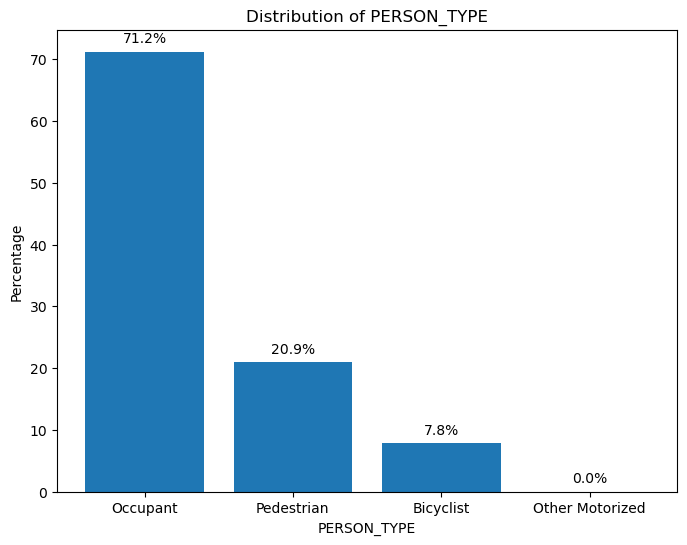

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['PERSON_TYPE'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the top of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(i, p + 1, f'{p:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title('Distribution of PERSON_TYPE')
plt.xlabel('PERSON_TYPE')
plt.ylabel('Percentage')

# Show the plot
plt.show()

#### Insights : The majority of accidents involve occupants (71.2%) and pedestrians (20.9%), suggesting that road accidents are a significant concern. Bicyclists are also represented, making up 7.8% of the dataset, while other motorized vehicles are nearly absent, implying a focus on passenger vehicle and pedestrian-related accidents.


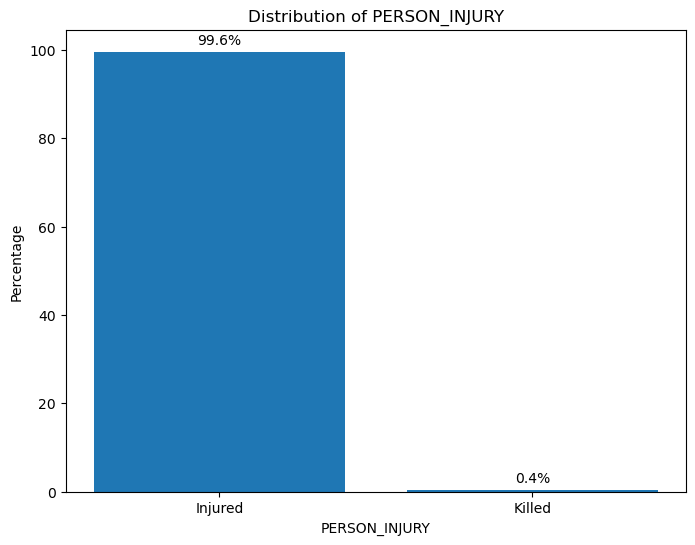

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['PERSON_INJURY'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the top of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(i, p + 1, f'{p:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title('Distribution of PERSON_INJURY')
plt.xlabel('PERSON_INJURY')
plt.ylabel('Percentage')

# Show the plot
plt.show()

#### Insights : The graph shows the distribution of PERSON_INJURY. It shows that the majority of the people (99.6%) were injured while 0.4% were killed. This indicates that the majority of the incidents were not fatal.


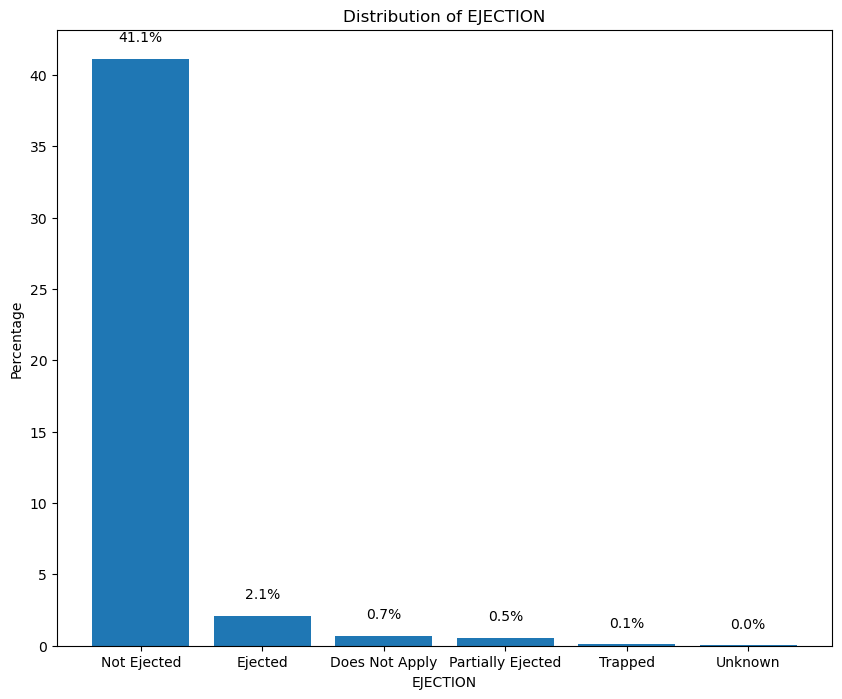

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['EJECTION'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the top of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(i, p + 1, f'{p:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title('Distribution of EJECTION')
plt.xlabel('EJECTION')
plt.ylabel('Percentage')

# Show the plot
plt.show()

#### Insights : The majority of the data points in the EJECTION feature, approximately 41.1%, belong to the "Not Ejected" category, indicating that most individuals were not ejected from the vehicle during the accident. The small number of data points in the other categories, such as "Ejected" (2.1%), "Trapped" (0.7%), and others, suggests that ejection events are relatively rare and may not be highly influential in analyzing the data.


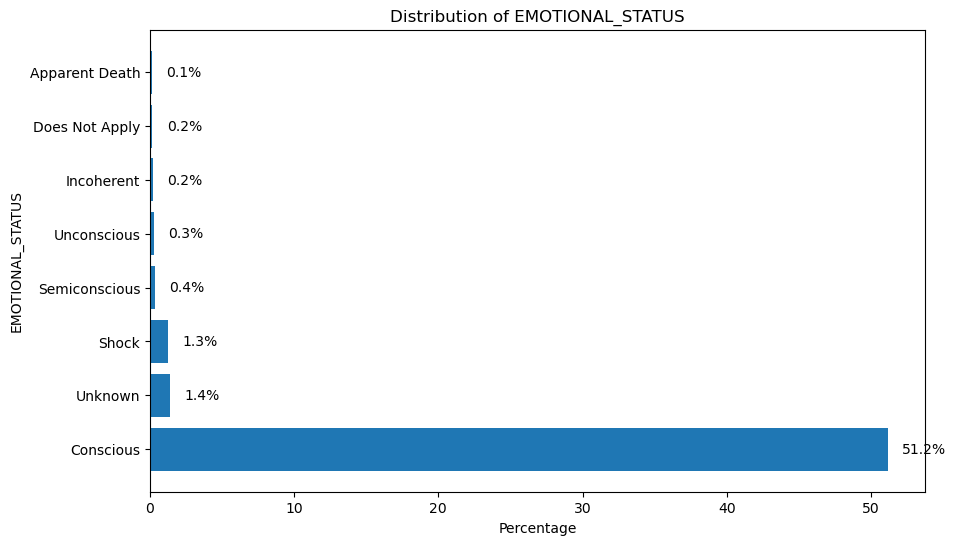

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['EMOTIONAL_STATUS'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the right of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(p + 1, i, f'{p:.1f}%', ha='left', va='center')

# Set the title and labels
plt.title('Distribution of EMOTIONAL_STATUS')
plt.xlabel('Percentage')
plt.ylabel('EMOTIONAL_STATUS')

# Show the plot
plt.show()

#### Insights : The majority of the individuals are conscious (51.2%), followed by those in a state of shock (1.3%), unknown (1.4%), and semiconscious (0.4%). The remaining states are very rare with only 0.1%, 0.2%, and 0.3% respectively. 


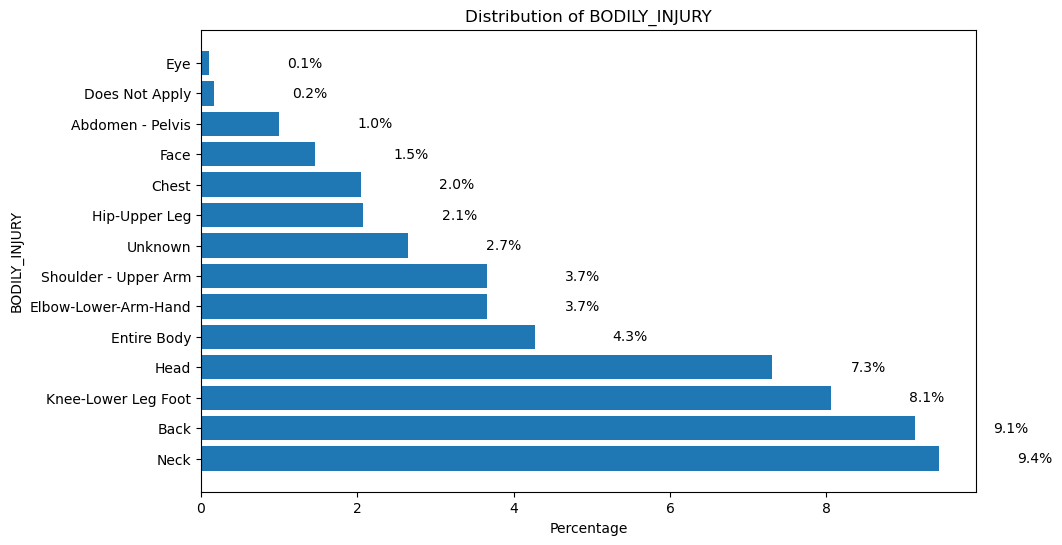

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['BODILY_INJURY'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the right of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(p + 1, i, f'{p:.1f}%', ha='left', va='center')

# Set the title and labels
plt.title('Distribution of BODILY_INJURY')
plt.xlabel('Percentage')
plt.ylabel('BODILY_INJURY')

# Show the plot
plt.show()

#### Insights : The most common body injuries occur in the neck, back, knee-lower leg foot, head, and entire body, accounting for 9.4%, 9.1%, 8.1%, 7.3%, and 4.3% of all injuries, respectively. In contrast, injuries to the eye and abdomen-pelvis are relatively rare, making up only 0.1% and 0.2% of all injuries, respectively.


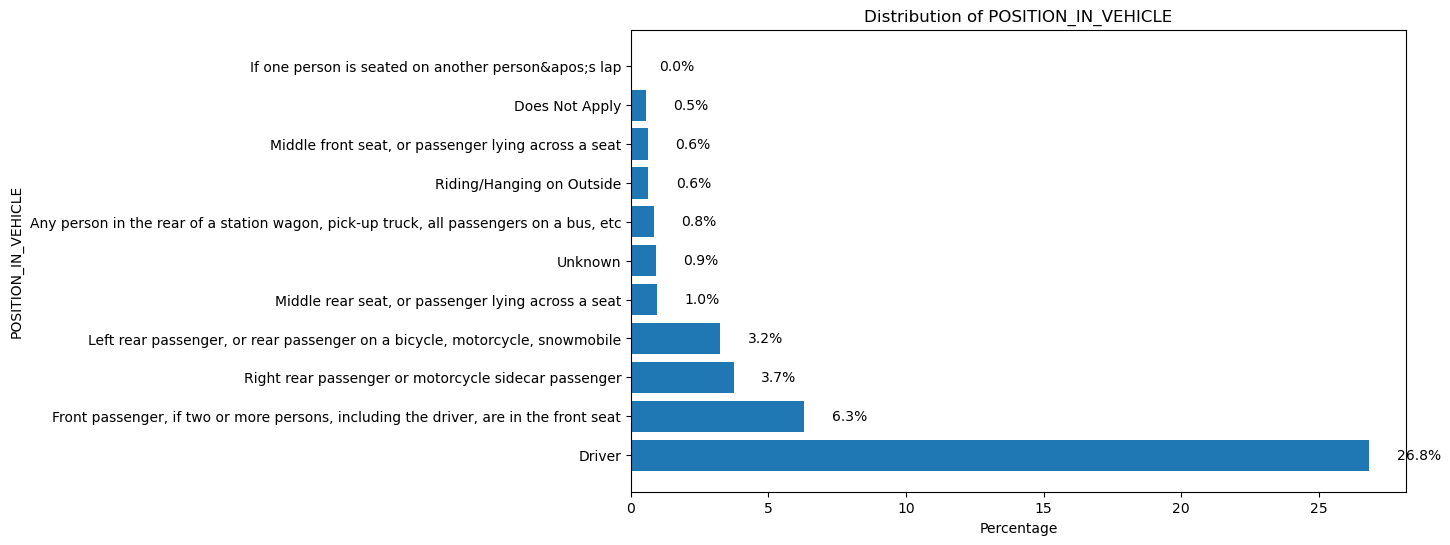

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['POSITION_IN_VEHICLE'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the right of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(p + 1, i, f'{p:.1f}%', ha='left', va='center')

# Set the title and labels
plt.title('Distribution of POSITION_IN_VEHICLE')
plt.xlabel('Percentage')
plt.ylabel('POSITION_IN_VEHICLE')

# Show the plot
plt.show()

#### Insights : The most common position is "Driver" with 26.8%, followed by "Front passenger, if two or more persons, including the driver, are in the front seat" with 6.3%. The least common position is "If one person is seated on another person's lap" with 0.0%.


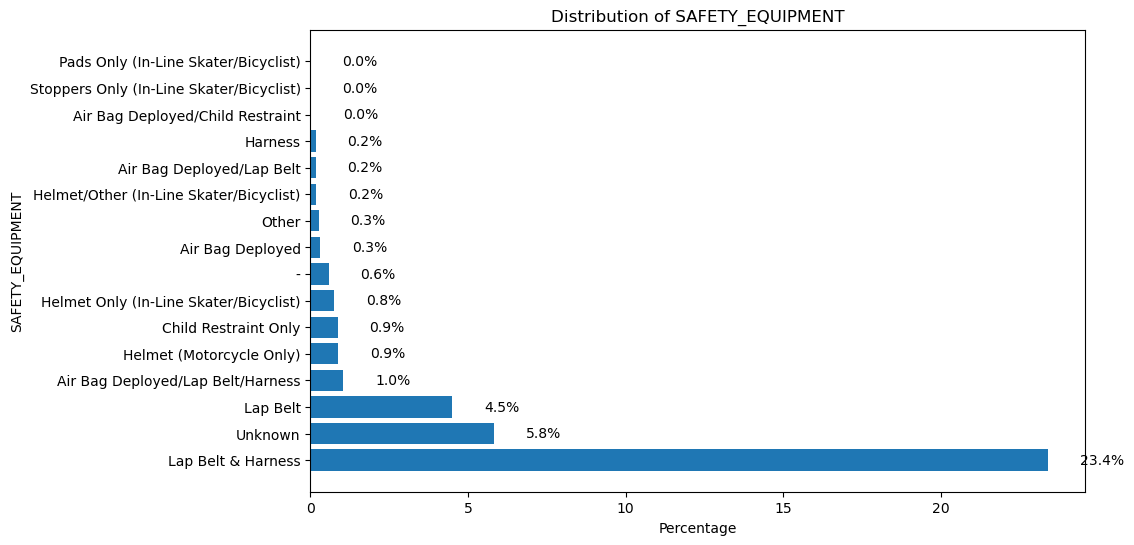

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['SAFETY_EQUIPMENT'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the right of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(p + 1, i, f'{p:.1f}%', ha='left', va='center')

# Set the title and labels
plt.title('Distribution of SAFETY_EQUIPMENT')
plt.xlabel('Percentage')
plt.ylabel('SAFETY_EQUIPMENT')

# Show the plot
plt.show()

#### Insights : The most common safety equipment used is "Lap Belt & Harness" with 23.4% of the total, followed by "Unknown" with 5.8%, while the least common ones are "Pads Only", "Stoppers Only", and "Air Bag Deployed/Child Restraint-" with 0.0% each. Helmets and air bags are also used, but to a lesser extent, with helmets accounting for 1.9% and air bags for 1.5% of the total.


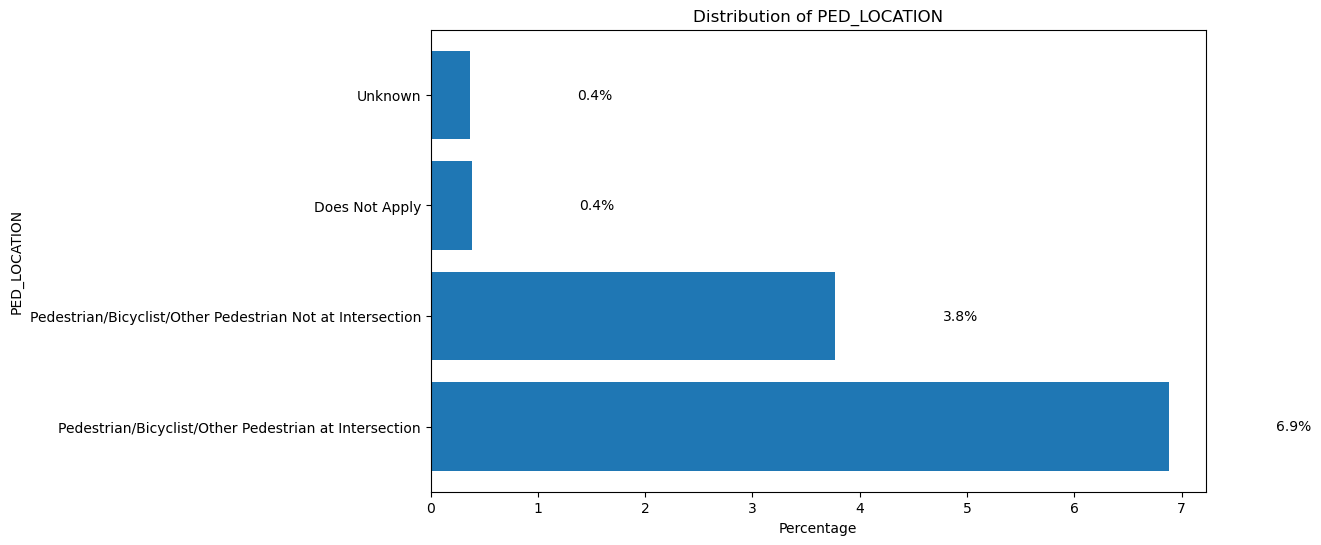

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['PED_LOCATION'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the right of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(p + 1, i, f'{p:.1f}%', ha='left', va='center')

# Set the title and labels
plt.title('Distribution of PED_LOCATION')
plt.xlabel('Percentage')
plt.ylabel('PED_LOCATION')

# Show the plot
plt.show()

#### Insights : Nearly 7% of pedestrian/bicyclist collisions occur at intersections, making them the most common location for these types of accidents. Additionally, another 3.8% of collisions occur when pedestrians/bicyclists are not at intersections, emphasizing the need for increased safety measures and awareness in these areas.

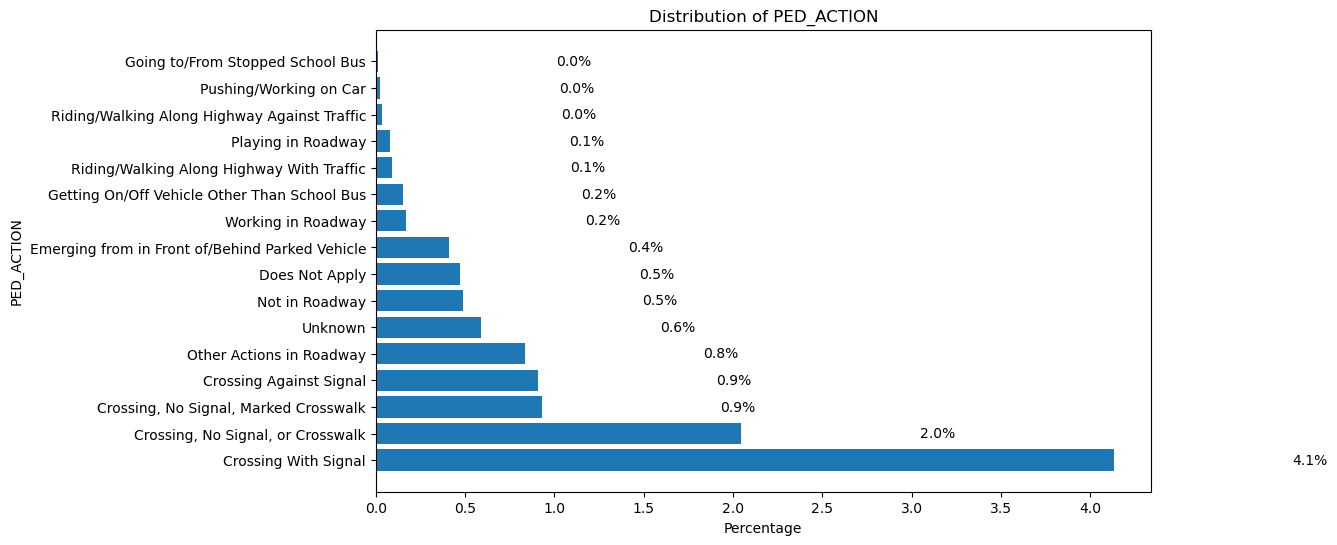

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['PED_ACTION'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the right of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(p + 1, i, f'{p:.1f}%', ha='left', va='center')

# Set the title and labels
plt.title('Distribution of PED_ACTION')
plt.xlabel('Percentage')
plt.ylabel('PED_ACTION')

# Show the plot
plt.show()

#### The distribution of PED_ACTION is heavily skewed towards "Crossing With Signal" which has about 4.1% of the data, followed by "Crossing, No Signal, or Crosswalk" at 2%. The rest of the PED_ACTION categories have a relatively small proportion of the data.

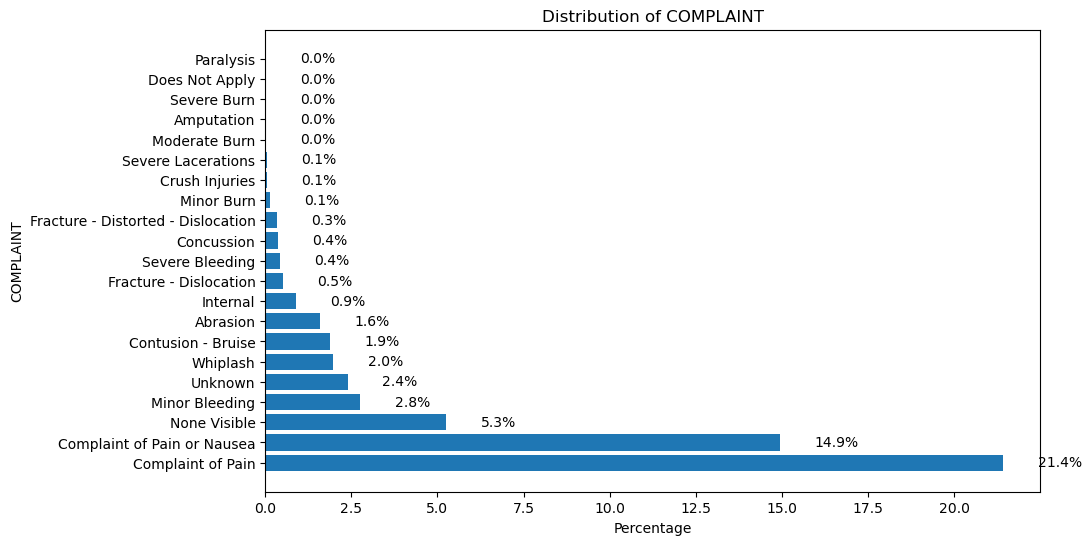

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['COMPLAINT'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the right of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(p + 1, i, f'{p:.1f}%', ha='left', va='center')

# Set the title and labels
plt.title('Distribution of COMPLAINT')
plt.xlabel('Percentage')
plt.ylabel('COMPLAINT')

# Show the plot
plt.show()

#### Insights : The most common complaint is "Complaint of Pain", which accounts for 21.4% of the total complaints. The second most common complaint is "Complaint of Pain or Nausea", which accounts for 14.9% of the total complaints. The remaining complaints are relatively infrequent, with the most common being "None Visible" at 5.3% and "Minor Bleeding" at 2.8%.


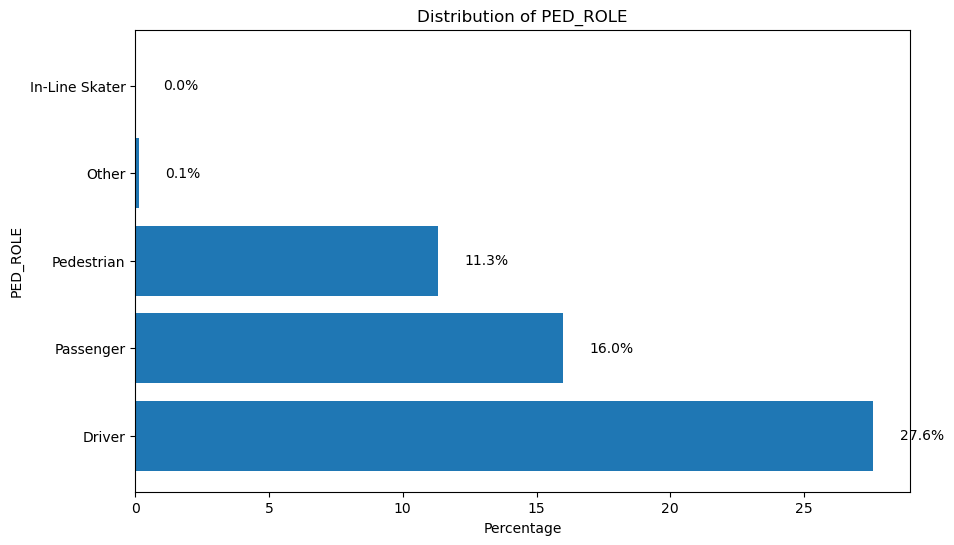

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['PED_ROLE'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the right of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(p + 1, i, f'{p:.1f}%', ha='left', va='center')

# Set the title and labels
plt.title('Distribution of PED_ROLE')
plt.xlabel('Percentage')
plt.ylabel('PED_ROLE')

# Show the plot
plt.show()

#### Insights :  Drivers and Passengers account for a significant proportion of those involved, at 27.6% and 16.0%, respectively, while pedestrians not in vehicles make up 11.3% of the total. Meanwhile, in-line skaters and others are almost never involved in accidents, with a negligible percentage of 0.0% and 0.1%, respectively.


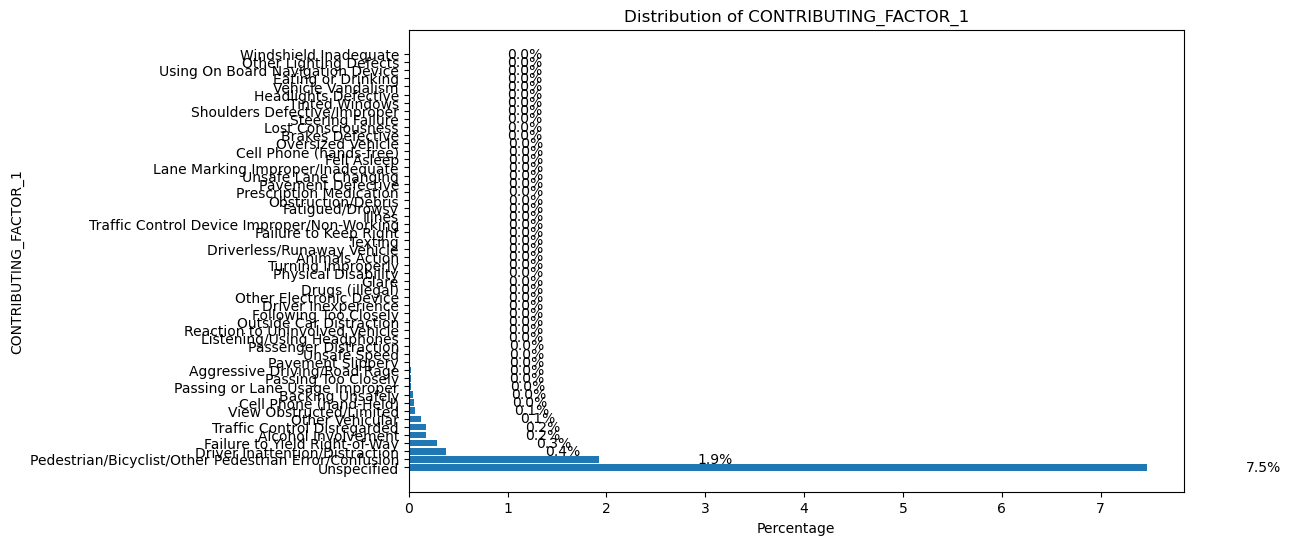

In [59]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['CONTRIBUTING_FACTOR_1'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the right of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(p + 1, i, f'{p:.1f}%', ha='left', va='center')

# Set the title and labels
plt.title('Distribution of CONTRIBUTING_FACTOR_1')
plt.xlabel('Percentage')
plt.ylabel('CONTRIBUTING_FACTOR_1')

# Show the plot
plt.show()

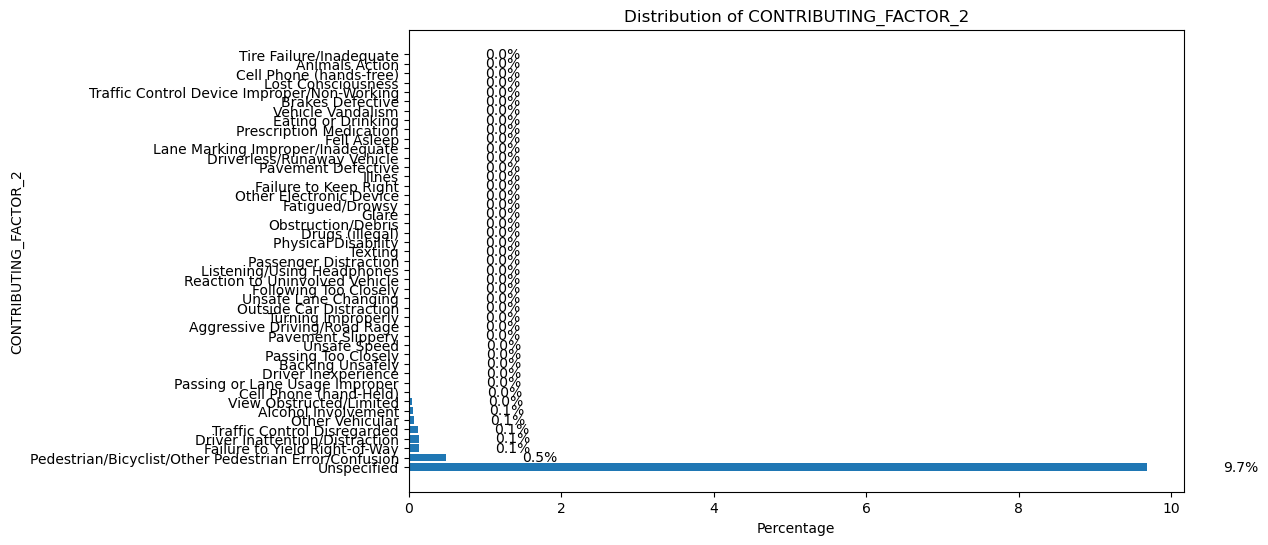

In [60]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['CONTRIBUTING_FACTOR_2'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the right of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(p + 1, i, f'{p:.1f}%', ha='left', va='center')

# Set the title and labels
plt.title('Distribution of CONTRIBUTING_FACTOR_2')
plt.xlabel('Percentage')
plt.ylabel('CONTRIBUTING_FACTOR_2')

# Show the plot
plt.show()

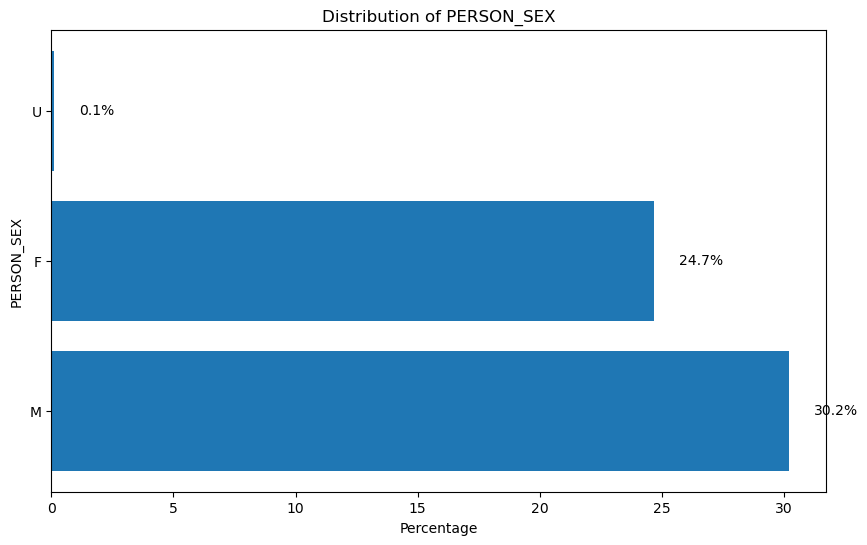

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count and percentage of each PERSON_TYPE
person_type_counts = df['PERSON_SEX'].value_counts()
person_type_percentages = (person_type_counts / len(df)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(person_type_percentages.index, person_type_percentages.values)

# Add percentage labels at the right of each bar
for i, p in enumerate(person_type_percentages.values):
    plt.text(p + 1, i, f'{p:.1f}%', ha='left', va='center')

# Set the title and labels
plt.title('Distribution of PERSON_SEX')
plt.xlabel('Percentage')
plt.ylabel('PERSON_SEX')

# Show the plot
plt.show()

#### Insights : The majority of people involved in accidents are male, making up 30.2% of the total, while females account for 24.7%. A negligible 0.1% of individuals involved in accidents have an unknown sex.


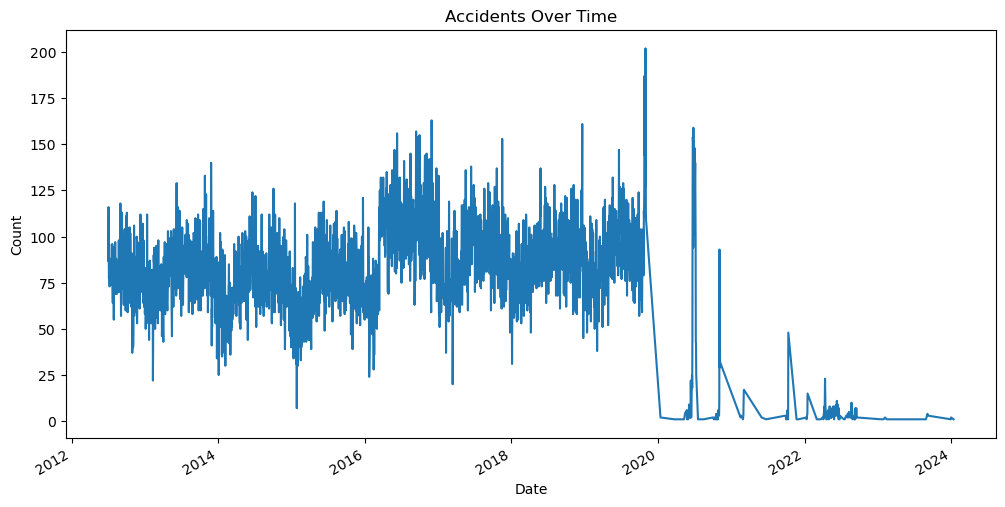

In [26]:
# Time Series (if applicable)
# Example: Convert CRASH_DATE to datetime if not already done
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

# Line plot of accidents over time
plt.figure(figsize=(12, 6))
df['CRASH_DATE'].value_counts().sort_index().plot()
plt.title('Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


#### Insights : The graph reveals a downward trend in accident numbers over the years, with a notable exception in 2020 where the count drops significantly, possibly due to the pandemic's impact on travel and activity. However, a surprising surge in accidents occurs in 2021, only to be followed by another sharp decline, suggesting that further analysis is needed to uncover the underlying causes of these fluctuations.
